In [1]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

phone_df=pd.read_csv("../datasets/phone_train.csv")
y_target=phone_df['price_range']
X_feature=phone_df.drop('price_range',axis=1)
phone_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8083333333333333


In [4]:
dt_clf.feature_importances_

array([0.13664095, 0.00412711, 0.00509962, 0.        , 0.01037145,
       0.00253976, 0.00464449, 0.00283255, 0.01342417, 0.00416841,
       0.01269761, 0.09207875, 0.07482109, 0.61817825, 0.        ,
       0.00584934, 0.00966921, 0.        , 0.        , 0.00285723])

<Axes: >

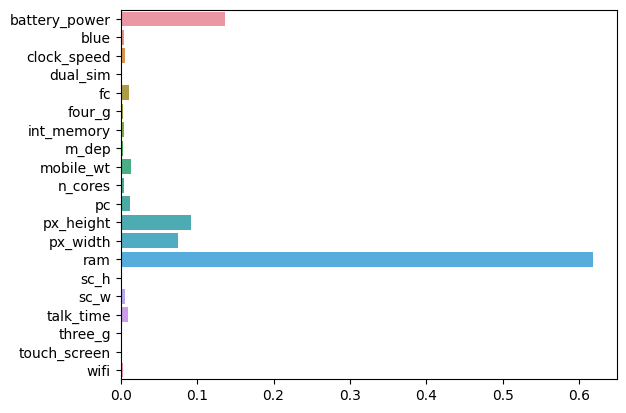

In [5]:
sns.barplot(x=dt_clf.feature_importances_, y=X_feature.columns)

In [10]:
phone_df=pd.read_csv("../datasets/phone_train.csv")
y_target=phone_df['price_range']
X_feature=phone_df[['battery_power', 'px_height','px_width','ram']]

In [11]:
X_feature.corr()

,battery_power,px_height,px_width,ram
battery_power,1.000000,0.014901,-0.008402,-0.000653
px_height,0.014901,1.000000,0.510664,-0.020352
px_width,-0.008402,0.510664,1.000000,0.004105
ram,-0.000653,-0.020352,0.004105,1.000000


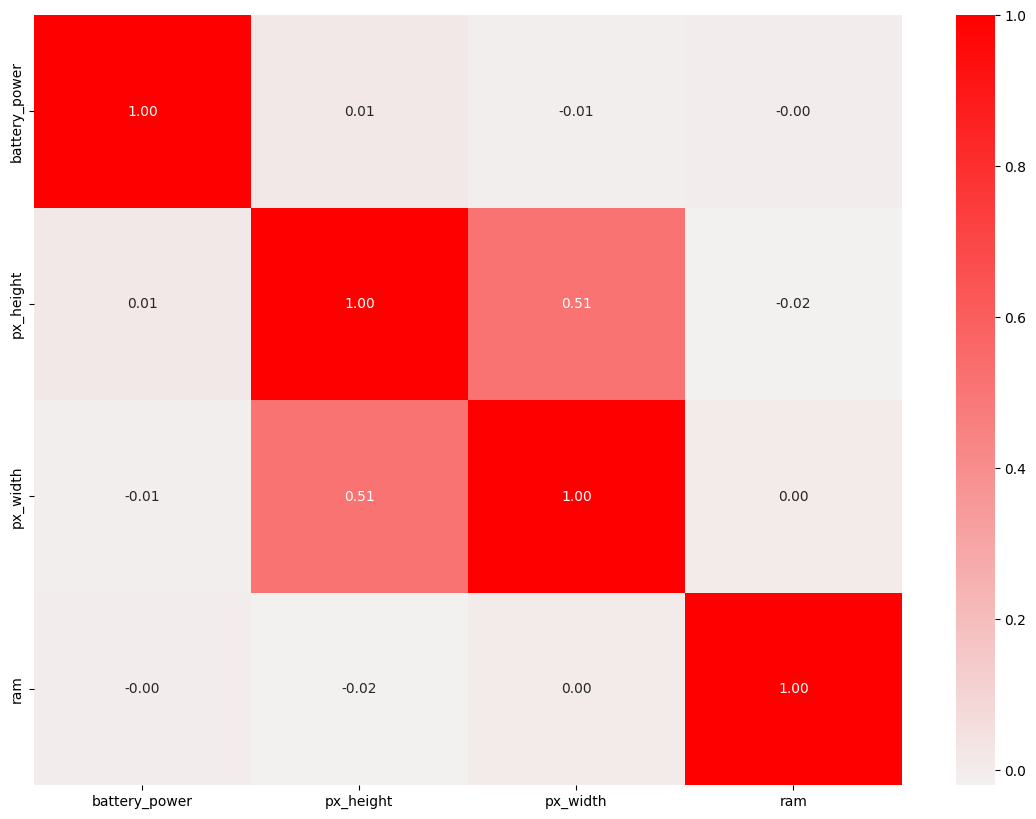

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
phone_df1 = phone_df[['battery_power', 'px_height','px_width','ram']]
phone_df1.corr()
cmap = sns.light_palette("red", as_cmap=True)
plt.figure(figsize=(14, 10))      
sns.heatmap(phone_df1.corr(), annot=True, cmap=cmap,fmt = '.2f')
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

# 타겟 변수와 피처 변수 설정
y_target = phone_df['price_range']
X_features = phone_df[['battery_power', 'px_height','ram']]

# 데이터 전처리: 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


params={'penalty':['l2','l1','elasticnet'],
        'C':[0.01,0.1,1,5,10,15,20,30]}


grid_cv=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("Accuracy:", accuracy)
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.9
LogisticRegression(C=10, random_state=0)
0.9114285714285714


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

# 타겟 변수와 피처 변수 설정
y_target = phone_df['price_range']
X_features = phone_df[['battery_power', 'px_height','ram']]

# 데이터 전처리: 표준화 (Standardization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


params={'penalty':['l2','l1','elasticnet','none'],
        'C':[0.01,0.1,1,5,10]}


grid_cv=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.8883333333333333
